In [16]:
import sqlite3 as sl
#from sklearn.neighbors import KernelDensity
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [18]:
dbfile = './web-application/database.db'
# Create a SQL connection to our SQLite database
con = sl.connect(dbfile)

# creating cursor
cur = con.cursor()
# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

# Be sure to close the connection
# con.close()

[('users',), ('activeSessions',), ('messages',), ('psychologists',), ('psychologistSessions',), ('userConversations',), ('clicks',), ('playbacks',)]


In [19]:
userIds = [a[0] for a in cur.execute("SELECT * FROM clicks")]
timestamps = [a[1] for a in cur.execute("SELECT * FROM clicks")]
print(userIds)
print(timestamps)
datetime.strptime(timestamps[0], "%Y-%m-%dT%H:%M:%S.%fZ")


['b21c36e9-0997-4c3e-8dea-0ca2a83e75c2', 'a48c3dc0-bdc1-454e-aad5-bfbe6974e0b8', 'a48c3dc0-bdc1-454e-aad5-bfbe6974e0b8', 'a48c3dc0-bdc1-454e-aad5-bfbe6974e0b8', '8e1ee910-353f-4859-bffa-392492c6a0b8', '8e1ee910-353f-4859-bffa-392492c6a0b8', '8e1ee910-353f-4859-bffa-392492c6a0b8', '8e1ee910-353f-4859-bffa-392492c6a0b8', '8e1ee910-353f-4859-bffa-392492c6a0b8', '3f9a385d-8bc8-4a7d-b3c7-bc0286810822', '3f9a385d-8bc8-4a7d-b3c7-bc0286810822', '6144fd5a-78c5-4b8a-9967-ba50c0367d03', '6144fd5a-78c5-4b8a-9967-ba50c0367d03', '6144fd5a-78c5-4b8a-9967-ba50c0367d03', '6144fd5a-78c5-4b8a-9967-ba50c0367d03', '6144fd5a-78c5-4b8a-9967-ba50c0367d03', '6144fd5a-78c5-4b8a-9967-ba50c0367d03', 'ec2dc883-d27f-40cd-b8de-4d1773478de7', '9ded63cd-a88d-496c-8142-66abee6e556b', '9ded63cd-a88d-496c-8142-66abee6e556b', '9ded63cd-a88d-496c-8142-66abee6e556b', '9ded63cd-a88d-496c-8142-66abee6e556b', '9ded63cd-a88d-496c-8142-66abee6e556b', '9ded63cd-a88d-496c-8142-66abee6e556b', '75aaee60-f638-476e-ac39-6106a7fe996c',

datetime.datetime(2024, 2, 26, 11, 6, 21, 562000)

In [20]:
con.close()

In [31]:
datetime_objects = np.array([datetime.strptime(a, "%Y-%m-%dT%H:%M:%S.%fZ") for a in timestamps])

In [10]:
# Example list of datetime objects
datetime_objects = [datetime(2024, 1, 1, 10, 30),
                    datetime(2024, 1, 2, 11, 0),
                    datetime(2024, 1, 3, 10, 45),
                    datetime(2024, 1, 4, 9, 15),
                    datetime(2024, 1, 5, 12, 0)]

# Convert datetime objects to numerical values (e.g., timestamps)
numeric_values = np.array([dt.timestamp() for dt in datetime_objects])

In [32]:
# Convert datetime objects to numerical values (e.g., timestamps)
numeric_values = np.array([dt.timestamp() for dt in datetime_objects])

In [33]:
# Varying kernel size using different bw_method values
bw_methods = ['scott', 0.1, 1.0, 10.0]  # Different bandwidths

# Perform KDE
kde = gaussian_kde(numeric_values)

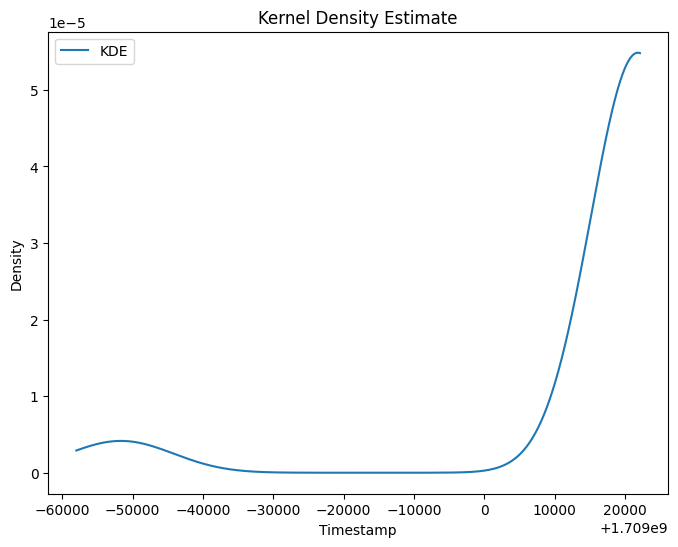

In [34]:
# Set up the range of values for which to estimate the density
x_values = np.linspace(min(numeric_values), max(numeric_values), 1000)

# Evaluate the KDE at the specified points
density_estimate = kde(x_values)

# Plotting the KDE
plt.figure(figsize=(8, 6))
plt.plot(x_values, density_estimate, label='KDE')
plt.xlabel('Timestamp')
plt.ylabel('Density')
plt.title('Kernel Density Estimate')
plt.legend()
plt.show()

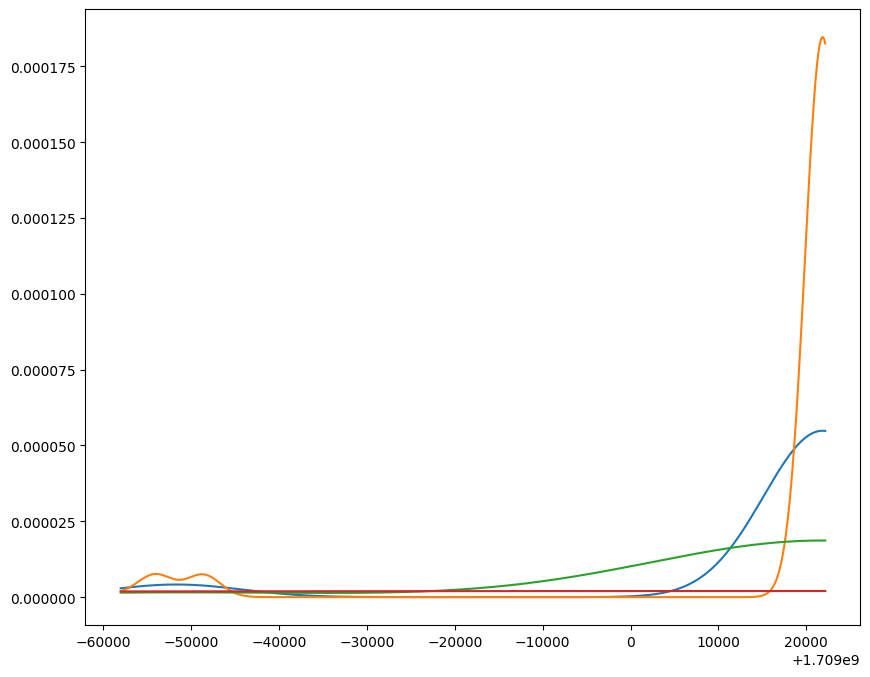

In [35]:
plt.figure(figsize=(10, 8))
for bw_method in bw_methods:
    kde = gaussian_kde(numeric_values, bw_method=bw_method)
    x_values = np.linspace(min(numeric_values), max(numeric_values), 1000)
    density_estimate = kde(x_values)
    plt.plot(x_values, density_estimate, label=f'bw_method={bw_method}')